### import all the libraries

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('E:\googleplaystore.csv')

In [3]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
df = df.drop(['App','Category','Content Rating','Type','Genres','Last Updated','Android Ver'],axis=1)

In [5]:
df.head()

,Rating,Reviews,Size,Installs,Price,Current Ver
0,4.1,159,19M,"10,000+",0,1.0.0
1,3.9,967,14M,"500,000+",0,2.0.0
2,4.7,87510,8.7M,"5,000,000+",0,1.2.4
3,4.5,215644,25M,"50,000,000+",0,Varies with device
4,4.3,967,2.8M,"100,000+",0,1.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       9367 non-null   float64
 1   Reviews      10841 non-null  object 
 2   Size         10841 non-null  object 
 3   Installs     10841 non-null  object 
 4   Price        10841 non-null  object 
 5   Current Ver  10833 non-null  object 
dtypes: float64(1), object(5)
memory usage: 508.3+ KB


In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

Rating         0
Reviews        0
Size           0
Installs       0
Price          0
Current Ver    0
dtype: int64

In [9]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  4. ,  4.8,
        4.9,  3.6,  3.7,  3.2,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [10]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+', 'Free'], dtype=object)

In [11]:
# converting free into zero
df['Installs'] = df['Installs'].replace('Free','0')

In [12]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+', '0'], dtype=object)

In [13]:
# removing + signs
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','') if str(x) else x)

In [14]:
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '100', '500', '10', '5',
       '50', '1', '0'], dtype=object)

In [15]:
# removing , from data
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','') if str(x) else x)

In [16]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1', '0'], dtype=object)

In [17]:
df['Installs'] = df['Installs'].astype(int)

In [18]:
df['Installs'].dtype

dtype('int32')

In [19]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [20]:
df = df.drop(['Current Ver'],axis=1)

In [21]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [22]:
# replace 'varies with device ' to 0
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [23]:
df['Size'] = df['Size'].apply(lambda x: x.replace('k','') if str('k') else x)

In [24]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79', '8.4M', '3.7M',
       '118', '44M', '695', '1.6M', '6.2M', '53M', '1.4M', '3.0M', '7.

In [25]:
# replacing + and , from our data

df['Size'] = df['Size'].apply(lambda x: x.replace('+','') if str(x) else x)
df['Size'] = df['Size'].apply(lambda x: x.replace(',','') if str(x) else x)

In [26]:
# replacing 'M' to k multiplied by 1000
df['Size'] = df['Size'].apply(lambda x: float(x.replace('M',''))*1000 if ('M') in str(x)
else x)

In [27]:
df['Size'].unique()

array([19000.0, 14000.0, 8700.0, 25000.0, 2800.0, 5600.0, 29000.0,
       33000.0, 3100.0, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0,
       5500.0, 17000.0, 39000.0, 31000.0, 4200.0, 23000.0, 6000.0, 6100.0,
       4600.0, 9200.0, 5200.0, 11000.0, 24000.0, 'Varies with device',
       9400.0, 15000.0, 10000.0, 1200.0, 26000.0, 8000.0, 7900.0, 56000.0,
       57000.0, 35000.0, 54000.0, '201', 3600.0, 5700.0, 8600.0, 2400.0,
       27000.0, 2700.0, 2500.0, 7000.0, 16000.0, 3400.0, 8900.0, 3900.0,
       2900.0, 38000.0, 32000.0, 5400.0, 18000.0, 1100.0, 2200.0, 4500.0,
       9800.0, 52000.0, 9000.0, 6700.0, 30000.0, 2600.0, 7100.0, 22000.0,
       6400.0, 3200.0, 8200.0, 4900.0, 9500.0, 5000.0, 5900.0, 13000.0,
       73000.0, 6800.0, 3500.0, 4000.0, 2300.0, 2100.0, 42000.0, 9100.0,
       55000.0, '23', 7300.0, 6500.0, 1500.0, 7500.0, 51000.0, 41000.0,
       48000.0, 8500.0, 46000.0, 8300.0, 4300.0, 4700.0, 3300.0, 40000.0,
       7800.0, 8800.0, 6600.0, 5100.0, 61000.0, 66000.0, '

In [28]:
df['Size'].unique()

array([19000.0, 14000.0, 8700.0, 25000.0, 2800.0, 5600.0, 29000.0,
       33000.0, 3100.0, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0,
       5500.0, 17000.0, 39000.0, 31000.0, 4200.0, 23000.0, 6000.0, 6100.0,
       4600.0, 9200.0, 5200.0, 11000.0, 24000.0, 'Varies with device',
       9400.0, 15000.0, 10000.0, 1200.0, 26000.0, 8000.0, 7900.0, 56000.0,
       57000.0, 35000.0, 54000.0, '201', 3600.0, 5700.0, 8600.0, 2400.0,
       27000.0, 2700.0, 2500.0, 7000.0, 16000.0, 3400.0, 8900.0, 3900.0,
       2900.0, 38000.0, 32000.0, 5400.0, 18000.0, 1100.0, 2200.0, 4500.0,
       9800.0, 52000.0, 9000.0, 6700.0, 30000.0, 2600.0, 7100.0, 22000.0,
       6400.0, 3200.0, 8200.0, 4900.0, 9500.0, 5000.0, 5900.0, 13000.0,
       73000.0, 6800.0, 3500.0, 4000.0, 2300.0, 2100.0, 42000.0, 9100.0,
       55000.0, '23', 7300.0, 6500.0, 1500.0, 7500.0, 51000.0, 41000.0,
       48000.0, 8500.0, 46000.0, 8300.0, 4300.0, 4700.0, 3300.0, 40000.0,
       7800.0, 8800.0, 6600.0, 5100.0, 61000.0, 66000.0, '

In [29]:
df['Size'] = df['Size'].replace('Varies with device',0)

In [30]:
df['Size'] = df['Size'].astype(float)

In [31]:
df['Size'].dtype

dtype('float64')

In [32]:
df.head(20)

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19000.0,10000,0
1,3.9,967,14000.0,500000,0
2,4.7,87510,8700.0,5000000,0
3,4.5,215644,25000.0,50000000,0
4,4.3,967,2800.0,100000,0
5,4.4,167,5600.0,50000,0
6,3.8,178,19000.0,50000,0
7,4.1,36815,29000.0,1000000,0
8,4.4,13791,33000.0,1000000,0
9,4.7,121,3100.0,10000,0


In [33]:
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace('M','0') if str(x) else x)

In [34]:
df['Reviews'] = df['Reviews'].astype(float)

In [35]:
df['Price'].unique()
df['Price'] = df['Price'].apply(lambda x: x.replace('$','') if str(x) else x)
df['Price'] = df['Price'].apply(lambda x: x.replace('Everyone','0') if str(x) else x)
df['Price'] = df['Price'].astype(float)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

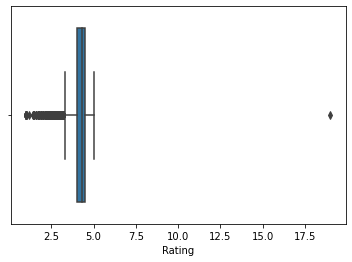

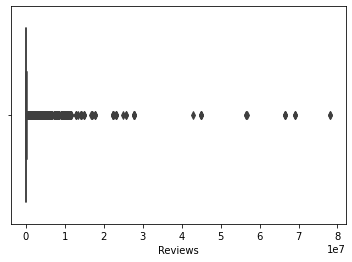

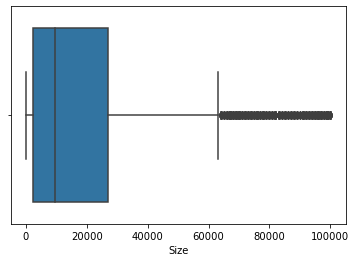

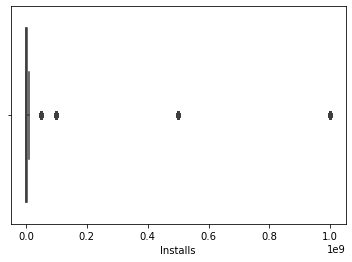

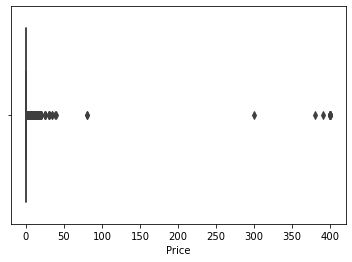

In [37]:
for i in df:
    sns.boxplot(df[i])
    plt.show()